# <span style="background-color: #EB824F; padding: 10px"><strong>        Credit Card Fraud Detection </strong></span>

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [18]:
#load dataset
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#to check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#to see the shape of the dataset
df.shape

(284807, 31)

In [5]:
#check the null values
df.isnull().sum().sum()

0

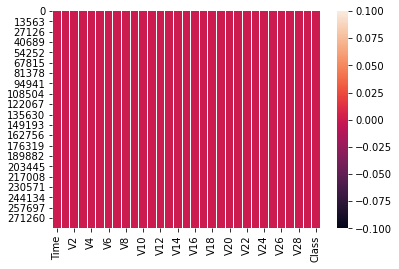

In [6]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [7]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

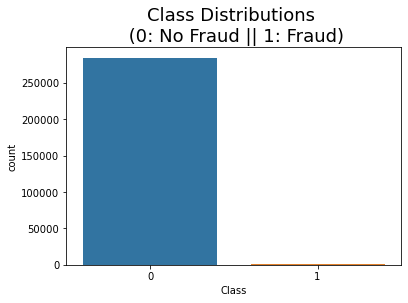

In [8]:
sns.countplot(x='Class',data = df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=18)

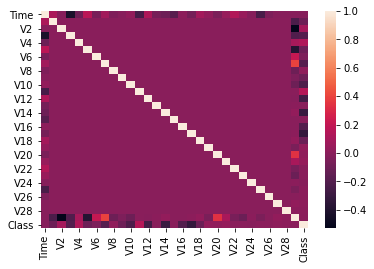

In [9]:
#check the co-relation between the input and output
dataplot = sns.heatmap(df.corr())
plt.show()

In [10]:
#separate input and output
X = df.drop("Class", axis=1)
Y = df['Class']

In [11]:
#scaling the inputs
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [12]:
#train the model with 80% of data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

In [13]:
Y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [14]:
#Data is not balance 
#use SMOTE

In [15]:
smote = SMOTE(random_state=0)

X_train, Y_train = smote.fit_resample(X_train,Y_train)
X_test, Y_test = smote.fit_resample(X_test,Y_test)

AttributeError: 'NoneType' object has no attribute 'split'

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\pawan\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.




  Using cached imbalanced_learn-0.12.3-py3-none-any.whl (258 kB)
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
#create a model
def create_model(model):
    #train model
    model.fit(X_train,Y_train)
    #test model
    Y_pred=model.predict(X_test)
    
    print("Classification report :", classification_report(Y_pred,Y_test))
    print("Confusion matrix :", confusion_matrix(Y_pred,Y_test))
    
    accuracy = accuracy_score(Y_pred,Y_test)
    recall = recall_score(Y_pred,Y_test)
    f1 = f1_score(Y_pred,Y_test)
    print('Accuracy :',accuracy,'Recall :',recall,"F1 :",f1)
    
    sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True)

# Logistic Regression

In [ ]:
lr=LogisticRegression()
lr=create_model(lr)

# Decision Tree Algorithm

In [ ]:
#create a object
dtc=DecisionTreeClassifier()
#call function
dtc=create_model(dtc)

In [ ]:
dict={'Input':X.columns,'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('IG',ascending=False,ignore_index=True)

In [ ]:
#using gini index
#create object
rfc=RandomForestClassifier(n_estimators=10,max_features=2,random_state=1)  #n_estimators means no of iterations
#call function
rfc=create_model(rfc)

In [ ]:
#using entropy
rfc=RandomForestClassifier(n_estimators=10,max_features=3,random_state=1,criterion='entropy') 
#n_estimators means no of iterations
#call function
rfc=create_model(rfc)

In [ ]:
#create object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=2,random_state=1)   #n_estimators means no of iterations
#call function
ada=create_model(ada)